## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [2]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [3]:
# Your code here . . .
euk[(euk.Class == 'Mammals') & (pd.to_numeric(euk['Number of genes'],errors='coerce') >= 20000)].Species

,Species
44,Homo sapiens
45,Mus musculus
65,Rattus norvegicus
70,Felis catus
74,Bos taurus
...,...
4977,Rattus norvegicus
5087,Macaca mulatta
5152,Macaca fascicularis
5180,Cricetulus griseus


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [4]:
# Your code here . . .
euk[(euk.Kingdom == 'Animals')].value_counts('Class')

,count
Class,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [5]:
# Your code here . . .
for k in ["Mammals", "Insects", "Fishes", "Other Animals", "Birds", "Roundworms", "Flatworms", "Reptiles", "Amphibians"]:
    print(k, euk[euk.Class == k].Species.nunique())

Mammals 313
Insects 402
Fishes 218
Other Animals 171
Birds 144
Roundworms 116
Flatworms 34
Reptiles 38
Amphibians 6


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [9]:
# Your code here . . .
Mac = euk[euk.Species.str.split(" ").str[0] == 'Macaca']
Mac


,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
119,Macaca mulatta,Animals,Mammals,3236.2200,41.2014,33215,55363,2014,Chromosome
306,Macaca fascicularis,Animals,Mammals,2946.8400,41.3398,33107,62703,2013,Chromosome
1116,Macaca nemestrina,Animals,Mammals,2948.7000,41.3,40715,66484,2015,Scaffold
1845,Macaca fuscata fuscata,Animals,Mammals,2930.7100,40.9,-,-,2018,Contig
4856,Macaca fascicularis,Animals,Mammals,2878.4700,41.2655,-,-,2011,Chromosome
4948,Macaca mulatta,Animals,Mammals,3097.3900,38.0268,-,-,2006,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.9700,41.8692,21524,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.5600,42.0609,21132,17456,2011,Chromosome
5646,Macaca mulatta,Animals,Mammals,2971.3100,41.1015,-,-,2015,Chromosome
5740,Macaca mulatta,Animals,Mammals,11.7537,40.1,-,-,2015,Chromosome


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [13]:
# Your code here . . .
euk['Species'] = euk.Species.str.split(" ").str[0:2].str.join(" ")
euk.Species

,Species
0,Emiliania huxleyi
1,Arabidopsis thaliana
2,Glycine max
3,Medicago truncatula
4,Solanum lycopersicum
...,...
8297,Saccharomyces cerevisiae
8298,Saccharomyces cerevisiae
8299,Saccharomyces cerevisiae
8300,Saccharomyces cerevisiae


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [35]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
species_count = pd.DataFrame(euk[euk.Kingdom =='Animals'].groupby('Class').Species.nunique())
species_count


,Species
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


<Axes: ylabel='Species'>

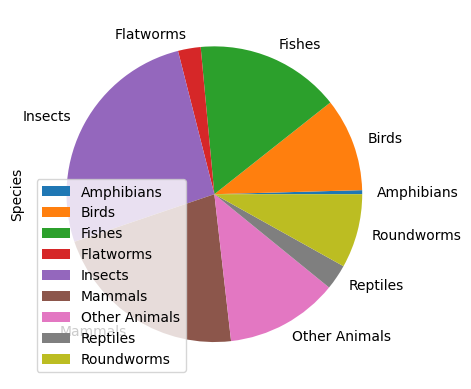

In [36]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
species_count.plot.pie(y='Species')